In [1]:
# Count the frequency of values in a given dataset
import collections
x = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter = collections.Counter(x)
print(counter)

print(len(x))

Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
13


In [2]:
# Convert frequency to probability - divide each frequency value by total number of values
pmf = []
for key,val in counter.items():
    pmf.append(round(val/len(x), 2))
    
print(counter.keys(), pmf)

dict_keys([1, 2, 3, 4, 5]) [0.31, 0.31, 0.15, 0.08, 0.15]


In [3]:
import numpy as np

np.array(pmf).sum()

1.0

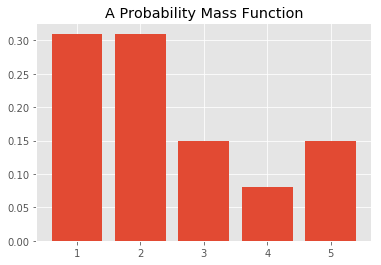

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.bar(counter.keys(), pmf);
plt.title("A Probability Mass Function");

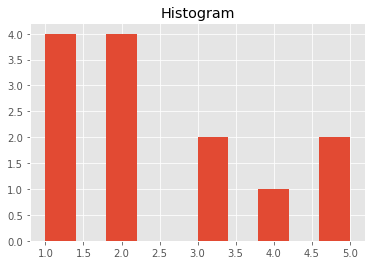

In [5]:
plt.hist(x);
plt.title('Histogram');

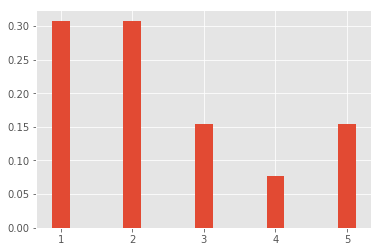

In [6]:
xtick_locations = np.arange(1.5, 7.5, 1)  # x=5, 15, 25, ...
xtick_labels = ['1', '2', '3', '4', '5']
bins = range(1, 7, 1) 
plt.xticks(xtick_locations, xtick_labels)

plt.hist(x, bins=bins,  rwidth=0.25, density=True);

In [7]:
size_and_count = { 17: 10, 22: 10, 27: 18, 32: 6, 37: 8, 42: 10, 47: 5, 52: 3, 57: 4 }

In [8]:
import numpy as np 
import collections

counter = collections.Counter(size_and_count)

# Determine total number of classes
sum_class = sum(counter.values())

pmf = []

# Divide each class size value by the total number of classes
for key, val in counter.items():
    pmf.append(round(val/sum_class, 3))
    
sizes = list(counter.keys())
sizes, pmf

# ([17, 22, 27, 32, 37, 42, 47, 52, 57],
# [0.135, 0.135, 0.243, 0.081, 0.108, 0.135, 0.068, 0.041, 0.054])

([17, 22, 27, 32, 37, 42, 47, 52, 57],
 [0.135, 0.135, 0.243, 0.081, 0.108, 0.135, 0.068, 0.041, 0.054])

In [9]:
# Uncomment the line below, the output should be 1
np.array(pmf).sum()

1.0

In [10]:
# Calculate the expected value (mu) using formula above
mu = np.multiply(sizes, pmf).sum()
mu

# 32.49

32.49

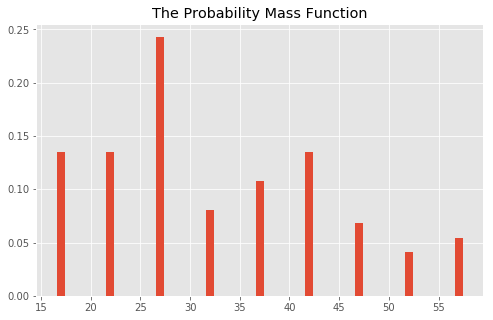

In [11]:
#Recall, we expected the average class size to be 32.5. Indeed, the calculation above confirms this. 
#We can plot a PMF function based on our findings for visualization. 
# Plot the pmf , it should look similar to the one shown below
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(counter.keys(), pmf);
plt.title ("The Probability Mass Function");

In [12]:
#Random Student Survey
#* For each class size $x$, multiply the class probability by $x$, the number of students who observe that particular class size
#* Get the sum of biased class sizes
biased = np.multiply(sizes, pmf)
biased_sum = biased.sum()

biased, biased_sum

# ([2.295, 2.97, 6.561, 2.592, 3.996, 5.67, 3.196, 2.132, 3.078], 32.49)

(array([2.295, 2.97 , 6.561, 2.592, 3.996, 5.67 , 3.196, 2.132, 3.078]), 32.49)

In [13]:
# Normalize the biased list and calculate the new PMF
pmf2 = []
for b in biased:
    pmf2.append(round(b/biased_sum, 3))
    
sizes, pmf2

# ([17, 22, 27, 32, 37, 42, 47, 52, 57],
# [0.071, 0.091, 0.202, 0.08, 0.123, 0.175, 0.098, 0.066, 0.095])

([17, 22, 27, 32, 37, 42, 47, 52, 57],
 [0.071, 0.091, 0.202, 0.08, 0.123, 0.175, 0.098, 0.066, 0.095])

In [14]:
#You can see that probability values in this PMF are different than our original pmf.
#Just like before, you can calculate the expected value $\mu$. 
mu_biased = np.multiply(sizes, pmf2).sum()
mu_biased
# 36.577

36.577

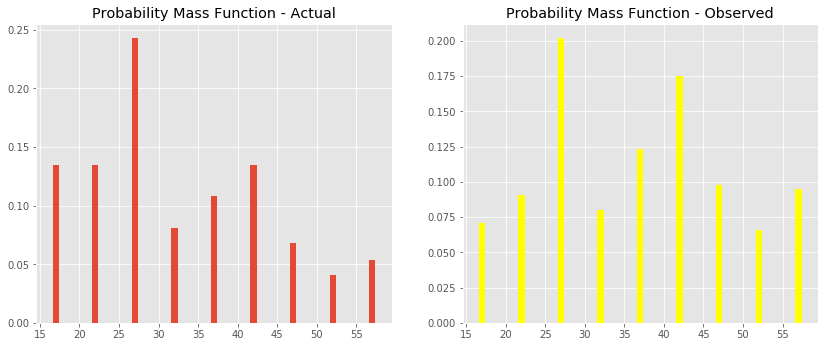

In [16]:
#Here comes the paradox
#* Plot a figure with two axes
#* Show pmf and pmf2 side by side
# Plot pmfs side by side
new_figure = plt.figure(figsize=(14,5.5))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.bar(counter.keys(), pmf);
ax2.bar(counter.keys(), pmf2, color="yellow");

ax.set_title ("Probability Mass Function - Actual");
ax2.set_title ("Probability Mass Function - Observed");

plt.show()

Your results tell you that in the biased distribution there are fewer small classes and more large classes. 

The mean of the biased distribution is 36.577, which is quite a bit higher than the actual mean (~32.5).

For an even more direct comparison, plot these PMFs on top of each other and change the parameter `alpha` so you can see both distributions well.

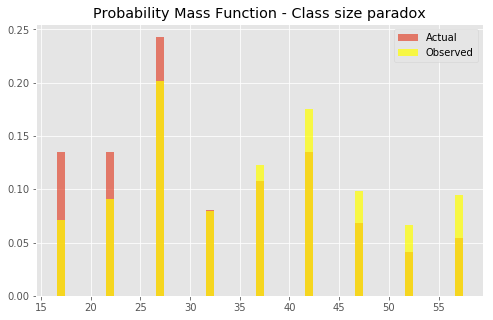

In [17]:
# Plot pmfs overlapping
plt.figure(figsize=(8,5))
plt.bar(counter.keys(), pmf, label= 'Actual', alpha = 0.7 );
plt.bar(counter.keys(), pmf2, color= "yellow", alpha = 0.7, label= 'Observed');
plt.title ("Probability Mass Function - Class size paradox");
plt.legend()
plt.show()

we looked at a common paradox called the "class size paradox", which deals with differences in observation by different people based on their circumstances.